In [95]:
import pandas as pd
from collections import Counter
from medvqa.utils.files import read_lines_from_txt

In [35]:
lines = read_lines_from_txt('/mnt/workspace/vinbig-cxr/dataset-png/splits/test.txt')

In [36]:
len(lines)

3000

In [5]:
agreement_df = pd.read_csv('/mnt/workspace/vinbig-cxr/dataset-png/agreement_df.csv')

In [6]:
agreement_df

,image_id,class_id,iou,n_bbs
0,0005e8e3701dfb1dd93d53e2ff537b6e,4,1.000000,1
1,0005e8e3701dfb1dd93d53e2ff537b6e,6,1.000000,1
2,0005e8e3701dfb1dd93d53e2ff537b6e,7,0.958384,2
3,0005e8e3701dfb1dd93d53e2ff537b6e,8,1.000000,1
4,0007d316f756b3fa0baea2ff514ce945,0,0.619907,2
...,...,...,...,...
15250,ffceb71a80efba3b83c88e11f4b9694b,13,0.307436,2
15251,ffe6f9fe648a7ec29a50feb92d6c15a4,0,1.000000,1
15252,ffe6f9fe648a7ec29a50feb92d6c15a4,3,0.846533,3
15253,ffe6f9fe648a7ec29a50feb92d6c15a4,9,1.000000,1


In [105]:
labels_df = pd.read_csv('/mnt/workspace/vinbig-cxr/dataset-png/labels.csv')

In [120]:

labels_df[k-1:k]

,image_id,Aortic enlargement,Atelectasis,Calcification,Cardiomegaly,Consolidation,ILD,Infiltration,Lung Opacity,Nodule/Mass,Other lesion,Pleural effusion,Pleural thickening,Pneumothorax,Pulmonary fibrosis
9,001d127bad87592efe45a5c7678f8b8d,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [37]:
test_ids = read_lines_from_txt('/mnt/workspace/vinbig-cxr/dataset-png/splits/test.txt')

In [39]:
test_ids[-2]

'04669ec4821d2dde14eb2f9a3f47eb7e.png'

In [43]:
labels_df.iloc[-3]

image_id              1e2a07154cad985c88bf3668850c3587
Aortic enlargement                                   0
Atelectasis                                          0
Calcification                                        0
Cardiomegaly                                         0
Consolidation                                        0
ILD                                                  0
Infiltration                                         0
Lung Opacity                                         0
Nodule/Mass                                          0
Other lesion                                         0
Pleural effusion                                     0
Pleural thickening                                   0
Pneumothorax                                         0
Pulmonary fibrosis                                   0
Name: 17997, dtype: object

In [18]:
VINBIG_DISEASES = [
    'Aortic enlargement',
    'Atelectasis',
    'Calcification',
    'Cardiomegaly',
    'Consolidation',
    'ILD',
    'Infiltration',
    'Lung Opacity',
    'Nodule/Mass',
    'Other lesion',
    'Pleural effusion',
    'Pleural thickening',
    'Pneumothorax',
    'Pulmonary fibrosis',
]

In [20]:
import numpy as np

In [22]:
_labels_df = labels_df[VINBIG_DISEASES]
_labels_array = labels_df[VINBIG_DISEASES].to_numpy().astype(np.int8)

In [25]:
_labels_array[2]

array([0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0], dtype=int8)

In [24]:
_labels_df

,Aortic enlargement,Atelectasis,Calcification,Cardiomegaly,Consolidation,ILD,Infiltration,Lung Opacity,Nodule/Mass,Other lesion,Pleural effusion,Pleural thickening,Pneumothorax,Pulmonary fibrosis
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
Counter(labels_df['Nodule/Mass'])

Counter({0.0: 17174, 1.0: 826})

In [45]:
true_df = pd.read_csv('/mnt/workspace/vinbig-cxr/dataset-png/true_df.csv')

In [47]:
true_df

,image_id,class_id,class_name,rad_id,x_min,y_min,x_max,y_max
0,000434271f63a053c4128a0ba6352c7f,14,No finding,R6,0.0,0.0,1.0,1.0
1,00053190460d56c53cc3e57321387478,14,No finding,R11,0.0,0.0,1.0,1.0
2,0005e8e3701dfb1dd93d53e2ff537b6e,4,Consolidation,R8,932.0,567.0,1197.0,896.0
3,0005e8e3701dfb1dd93d53e2ff537b6e,6,Infiltration,R10,900.0,587.0,1205.0,888.0
4,0005e8e3701dfb1dd93d53e2ff537b6e,7,Lung Opacity,R10,900.0,587.0,1205.0,888.0
...,...,...,...,...,...,...,...,...
25966,ffe6f9fe648a7ec29a50feb92d6c15a4,9,Other lesion,R10,563.0,1148.0,593.0,1185.0
25967,ffea246f04196af602c7dc123e5e48fc,14,No finding,R13,0.0,0.0,1.0,1.0
25968,ffeffc54594debf3716d6fcd2402a99f,0,Aortic enlargement,R8,1224.0,733.0,1560.0,1176.0
25969,fff0f82159f9083f3dd1f8967fc54f6a,14,No finding,R8,0.0,0.0,1.0,1.0


In [49]:
len(set(true_df['image_id']))

15000

In [11]:
from medvqa.utils.files import read_lines_from_txt

In [98]:
images = read_lines_from_txt('/mnt/workspace/vinbig-cxr/dataset-png/splits/all.txt')

In [99]:
len(images)

18000

In [60]:
image_labels_train_df = pd.read_csv('/mnt/workspace/vinbig-cxr/dataset-png/annotations/image_labels_train.csv')

In [108]:
image_labels_test_df = pd.read_csv('/mnt/workspace/vinbig-cxr/dataset-png/annotations/image_labels_test.csv')

In [140]:
k = 14199
labels_df[k:k+1]

,image_id,Aortic enlargement,Atelectasis,Calcification,Cardiomegaly,Consolidation,ILD,Infiltration,Lung Opacity,Nodule/Mass,Other lesion,Pleural effusion,Pleural thickening,Pneumothorax,Pulmonary fibrosis
14199,f16ce642cd627ff7e0382e746da96e7f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [141]:
image_labels_train_df[labels_df.columns][k*3:(k+1)*3]

,image_id,Aortic enlargement,Atelectasis,Calcification,Cardiomegaly,Consolidation,ILD,Infiltration,Lung Opacity,Nodule/Mass,Other lesion,Pleural effusion,Pleural thickening,Pneumothorax,Pulmonary fibrosis
42597,f16ce642cd627ff7e0382e746da96e7f,0,0,0,0,0,0,0,0,1,0,0,0,0,0
42598,f16ce642cd627ff7e0382e746da96e7f,0,0,0,0,0,0,0,0,0,0,0,0,0,0
42599,f16ce642cd627ff7e0382e746da96e7f,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [65]:
image_labels_test_df

,image_id,Aortic enlargement,Atelectasis,Calcification,Cardiomegaly,Clavicle fracture,Consolidation,Edema,Emphysema,Enlarged PA,...,Pneumothorax,Pulmonary fibrosis,Rib fracture,Other lesion,COPD,Lung tumor,Pneumonia,Tuberculosis,Other disease,No finding
0,e0dc2e79105ad93532484e956ef8a71a,0,1,1,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
1,0aed23e64ebdea798486056b4f174424,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,aa15cfcfca7605465ca0513902738b95,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,665c4a6d2693dc0286d65ab479c9b169,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,42da2c134b53cb5594774d3d29faac59,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,a039af299f86007d0d77da077a6def9a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2996,aba3d1f5b1c04236f52a8980929b2cfa,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2997,6d3d6b53f358a983b486e9e03144eb62,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2998,d6678cb7ae39f575d35ab9da6d7cb171,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [90]:
DISEASES = ['Aortic enlargement', 'Atelectasis', 'Calcification',
       'Cardiomegaly', 'Clavicle fracture', 'Consolidation', 'Edema',
       'Emphysema', 'Enlarged PA', 'ILD', 'Infiltration', 'Lung Opacity',
       'Lung cavity', 'Lung cyst', 'Mediastinal shift', 'Nodule/Mass',
       'Pleural effusion', 'Pleural thickening', 'Pneumothorax',
       'Pulmonary fibrosis', 'Rib fracture', 'Other lesion', 'COPD',
       'Lung tumor', 'Pneumonia', 'Tuberculosis', 'Other diseases',
       'No finding']

In [93]:
len(DISEASES)

28

In [72]:
for x in DISEASES:
    print(Counter(image_labels_test_df[x]), x)

Counter({0: 2780, 1: 220}) Aortic enlargement
Counter({0: 2914, 1: 86}) Atelectasis
Counter({0: 2806, 1: 194}) Calcification
Counter({0: 2691, 1: 309}) Cardiomegaly
Counter({0: 2998, 1: 2}) Clavicle fracture
Counter({0: 2904, 1: 96}) Consolidation
Counter({0: 3000}) Edema
Counter({0: 2997, 1: 3}) Emphysema
Counter({0: 2992, 1: 8}) Enlarged PA
Counter({0: 2779, 1: 221}) ILD
Counter({0: 2942, 1: 58}) Infiltration
Counter({0: 2916, 1: 84}) Lung Opacity
Counter({0: 2991, 1: 9}) Lung cavity
Counter({0: 2998, 1: 2}) Lung cyst
Counter({0: 2980, 1: 20}) Mediastinal shift
Counter({0: 2824, 1: 176}) Nodule/Mass
Counter({0: 2889, 1: 111}) Pleural effusion
Counter({0: 2831, 1: 169}) Pleural thickening
Counter({0: 2982, 1: 18}) Pneumothorax
Counter({0: 2783, 1: 217}) Pulmonary fibrosis
Counter({0: 2989, 1: 11}) Rib fracture
Counter({0: 2906, 1: 94}) Other lesion
Counter({0: 2998, 1: 2}) COPD
Counter({0: 2920, 1: 80}) Lung tumor
Counter({0: 2754, 1: 246}) Pneumonia
Counter({0: 2836, 1: 164}) Tubercu

In [83]:
image_labels_train_df.columns

Index(['image_id', 'rad_id', 'Aortic enlargement', 'Atelectasis',
       'Calcification', 'Cardiomegaly', 'Clavicle fracture', 'Consolidation',
       'Edema', 'Emphysema', 'Enlarged PA', 'ILD', 'Infiltration',
       'Lung Opacity', 'Lung cavity', 'Lung cyst', 'Mediastinal shift',
       'Nodule/Mass', 'Pleural effusion', 'Pleural thickening', 'Pneumothorax',
       'Pulmonary fibrosis', 'Rib fracture', 'Other lesion', 'COPD',
       'Lung tumor', 'Pneumonia', 'Tuberculosis', 'Other diseases',
       'No finding'],
      dtype='object')

In [92]:
image_labels_train_df[DISEASES].values

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [80]:
for x in DISEASES:
    if x == 'Other disease': x = 'Other diseases'
    print(Counter(image_labels_train_df[x]), x)

Counter({0: 37812, 1: 7188}) Aortic enlargement
Counter({0: 44733, 1: 267}) Atelectasis
Counter({0: 44308, 1: 692}) Calcification
Counter({0: 39570, 1: 5430}) Cardiomegaly
Counter({0: 44971, 1: 29}) Clavicle fracture
Counter({0: 44495, 1: 505}) Consolidation
Counter({0: 44986, 1: 14}) Edema
Counter({0: 44899, 1: 101}) Emphysema
Counter({0: 44844, 1: 156}) Enlarged PA
Counter({0: 44380, 1: 620}) ILD
Counter({0: 44051, 1: 949}) Infiltration
Counter({0: 42955, 1: 2045}) Lung Opacity
Counter({0: 44920, 1: 80}) Lung cavity
Counter({0: 44962, 1: 38}) Lung cyst
Counter({0: 44730, 1: 270}) Mediastinal shift
Counter({0: 43569, 1: 1431}) Nodule/Mass
Counter({0: 42889, 1: 2111}) Pleural effusion
Counter({0: 41743, 1: 3257}) Pleural thickening
Counter({0: 44801, 1: 199}) Pneumothorax
Counter({0: 41729, 1: 3271}) Pulmonary fibrosis
Counter({0: 44850, 1: 150}) Rib fracture
Counter({0: 43357, 1: 1643}) Other lesion
Counter({0: 44954, 1: 46}) COPD
Counter({0: 44522, 1: 478}) Lung tumor
Counter({0: 434

In [1]:
from IPython.display import Image as iImage

In [5]:
# iImage('/mnt/workspace/vinbig-cxr/dataset-png/organ-masks/v1/515b5247a057b966fa2d1bd50907fd79.png')

In [96]:
from PIL import Image

In [103]:
img = Image.open('/mnt/workspace/vinbig-cxr/dataset-png/images/' + images[-1])

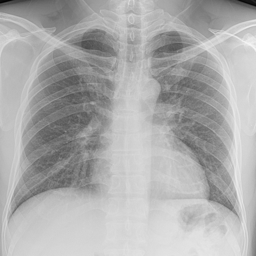

In [102]:
img.resize((256, 256))

In [32]:
images[0]

'6db32897e4b479fcf553e489b4cd255f.png'

In [8]:
!python ../../scripts/vinbig/resize_images.py \
        --width 256 \
        --height 256 \
        --save-folder "/mnt/workspace/vinbig-cxr/dataset-png/images-256x256/"

Resizing 18000 images to 256 x 256 ...
100%|█████████████████████████████████████| 18000/18000 [25:10<00:00, 11.91it/s]
Done!


In [149]:
!python ../../scripts/vinbig/resize_images.py \
        --width 512 \
        --height 512 \
        --keep-aspect-ratio \
        --source-folder "/mnt/workspace/vinbig-cxr/dataset-jpg/images/" \
        --target-folder "/mnt/workspace/vinbig-cxr/dataset-jpg/images-512x512(keep_aspect_ratio)/" \
        --num-workers 10

Resizing 18000 images from
	/mnt/workspace/vinbig-cxr/dataset-jpg/images/ to
	/mnt/workspace/vinbig-cxr/dataset-jpg/images-512x512(keep_aspect_ratio)/
Keep aspect ratio: True
New size: 512

['/mnt/workspace/vinbig-cxr/dataset-jpg/images/61353a4bf860223894df6ca7dcd857d1.jpg',
 '/mnt/workspace/vinbig-cxr/dataset-jpg/images/bebbc91bc41beeb5580968fb34b7c5e2.jpg',
 '/mnt/workspace/vinbig-cxr/dataset-jpg/images/e1a81180dcdefcc5e4153346081bc162.jpg',
 '/mnt/workspace/vinbig-cxr/dataset-jpg/images/46f34e017ef81cdc26de68f11bf7280d.jpg',
 '/mnt/workspace/vinbig-cxr/dataset-jpg/images/37d00f2fdb0521a0f3fd6c7ec458ff61.jpg']

['/mnt/workspace/vinbig-cxr/dataset-jpg/images-512x512(keep_aspect_ratio)/61353a4bf860223894df6ca7dcd857d1.jpg',
 '/mnt/workspace/vinbig-cxr/dataset-jpg/images-512x512(keep_aspect_ratio)/bebbc91bc41beeb5580968fb34b7c5e2.jpg',
 '/mnt/workspace/vinbig-cxr/dataset-jpg/images-512x512(keep_aspect_ratio)/e1a81180dcdefcc5e4153346081bc162.jpg',
 '/mnt/workspace/vinbig-cxr/dataset-jpg/

In [145]:
!python ../../scripts/vinbig/convert_dicoms_to_jpg.py \
        --train-dicom-folder "/mnt/workspace/vinbig-cxr/train/" \
        --test-dicom-folder "/mnt/workspace/vinbig-cxr/test/" \
        --save-folder "/mnt/workspace/vinbig-cxr/dataset-jpg/images/" \
        --num-workers 8

Found 15000 train DICOMs and 3000 test DICOMs
('source_dicom_filepaths[:5]: '
 "['/mnt/workspace/vinbig-cxr/train/4d30c7c316cc63ca6bdacec29f21dea7.dicom', "
 "'/mnt/workspace/vinbig-cxr/train/f32ab457c492c30221d3a89fe7c6b25a.dicom', "
 "'/mnt/workspace/vinbig-cxr/train/6d1dfc99d244e3cb3309a5d2814e5422.dicom', "
 "'/mnt/workspace/vinbig-cxr/train/be6b07923e33b791410d42b507c4eeae.dicom', "
 "'/mnt/workspace/vinbig-cxr/train/26675a820164ae13cdaed176598fff22.dicom']")
('target_jpeg_filepaths[:5]: '
 "['/mnt/workspace/vinbig-cxr/dataset-jpg/images/4d30c7c316cc63ca6bdacec29f21dea7.jpg', "
 "'/mnt/workspace/vinbig-cxr/dataset-jpg/images/f32ab457c492c30221d3a89fe7c6b25a.jpg', "
 "'/mnt/workspace/vinbig-cxr/dataset-jpg/images/6d1dfc99d244e3cb3309a5d2814e5422.jpg', "
 "'/mnt/workspace/vinbig-cxr/dataset-jpg/images/be6b07923e33b791410d42b507c4eeae.jpg', "
 "'/mnt/workspace/vinbig-cxr/dataset-jpg/images/26675a820164ae13cdaed176598fff22.jpg']")

Converting 18000 DICOMs to JPEGs ...
/home/pamessina/

In [8]:
import pandas as pd
from medvqa.utils.files import load_json_file

In [6]:
bboxes = load_json_file('/mnt/workspace/vinbig-cxr/dataset-png/bboxes.json')

In [7]:
len(bboxes)

4394

In [9]:
annotations_test_df = pd.read_csv('/mnt/workspace/vinbig-cxr/dataset-png/annotations/annotations_test.csv')

In [10]:
annotations_train_df = pd.read_csv('/mnt/workspace/vinbig-cxr/dataset-png/annotations/annotations_train.csv')

In [19]:
annotations_train_df

,image_id,rad_id,class_name,x_min,y_min,x_max,y_max
0,000434271f63a053c4128a0ba6352c7f,R2,No finding,NaN,NaN,NaN,NaN
1,000434271f63a053c4128a0ba6352c7f,R3,No finding,NaN,NaN,NaN,NaN
2,000434271f63a053c4128a0ba6352c7f,R6,No finding,NaN,NaN,NaN,NaN
3,00053190460d56c53cc3e57321387478,R11,No finding,NaN,NaN,NaN,NaN
4,00053190460d56c53cc3e57321387478,R2,No finding,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
69047,fff0f82159f9083f3dd1f8967fc54f6a,R8,No finding,NaN,NaN,NaN,NaN
69048,fff0f82159f9083f3dd1f8967fc54f6a,R9,No finding,NaN,NaN,NaN,NaN
69049,fff2025e3c1d6970a8a6ee0404ac6940,R1,No finding,NaN,NaN,NaN,NaN
69050,fff2025e3c1d6970a8a6ee0404ac6940,R2,No finding,NaN,NaN,NaN,NaN


In [32]:
import numpy as np

unique_train_image_ids = annotations_train_df[annotations_train_df['x_min'].notna()]['image_id'].unique()

In [33]:
len(unique_train_image_ids)

4522

In [27]:
unique_test_image_ids = annotations_test_df[(annotations_test_df['x_min'] == annotations_test_df['x_min'])]['image_id'].unique()

In [29]:
len(unique_test_image_ids)

949

In [30]:
unique_test_image_ids

array(['e0dc2e79105ad93532484e956ef8a71a',
       '0aed23e64ebdea798486056b4f174424',
       'aa15cfcfca7605465ca0513902738b95',
       '665c4a6d2693dc0286d65ab479c9b169',
       '42da2c134b53cb5594774d3d29faac59',
       'c7179539654a1b3b7977e56e7e3009d5',
       'bfd1974dc9778aadb407a11b57ab748f',
       '618777b8305b062583337d9a6b7a3d4e',
       'e54b5a593bc03c789ecdc18d8270964e',
       '3019aec706bd013e1e3348564fbfd086',
       'efbe54fcf4bdab5041ecdf15af5fcd52',
       '40497da14aafc428210b623fc8445288',
       '934e2731a86f3a6d750f7f7d9eaea85c',
       '91123b24b8a4c289820bbb2dc6dabdfe',
       '688ecdb1a4e994d42b5a50a8c4a9736f',
       'bf754344a692a87c08c480dccf75e0c6',
       '6cbbbc0e77251e60d6f4af673cc19e2a',
       '9b609fc8e82081f4ac5bf83b8a0fbc5c',
       '31b4de538dd6272b05e295142c5ccc2a',
       '9262bfe5dc41410f1725ebdd26a22334',
       '97f0ad3b3ccbfc848bf9cc7e1a76377c',
       '56237d3770e31568eb965067d2d948af',
       '218e819ed8c0fe25c92ee7f1d5b993c7',
       '390

In [35]:
for (image_id, class_name), group in annotations_train_df[annotations_train_df['x_min'].notna()].groupby(['image_id', 'class_name']):
    bboxes = group[['x_min', 'y_min', 'x_max', 'y_max']].values
    print(image_id)
    print(class_name)
    print(bboxes)
    break

0005e8e3701dfb1dd93d53e2ff537b6e
Consolidation
[[ 932.47198486  567.7789917  1197.77001953  896.40899658]]


In [1]:
from importlib import reload
import medvqa

In [42]:
reload(medvqa.datasets.vinbig)

<module 'medvqa.datasets.vinbig' from '/home/pamessina/medvqa/medvqa/datasets/vinbig/__init__.py'>

In [43]:
from medvqa.datasets.vinbig import (
    load_train_image_id_2_bboxes,
    load_test_image_id_2_bboxes,
    load_labels,
    print_labels,
    VINBIG_IMAGE_LABELS_TRAIN_CSV_PATH,
    visualize_image_with_bounding_boxes,
    get_unique_bbox_names,
)

In [4]:
get_unique_bbox_names()

['Aortic enlargement',
 'Atelectasis',
 'Calcification',
 'Cardiomegaly',
 'Clavicle fracture',
 'Consolidation',
 'Edema',
 'Emphysema',
 'Enlarged PA',
 'ILD',
 'Infiltration',
 'Lung Opacity',
 'Lung cavity',
 'Lung cyst',
 'Mediastinal shift',
 'Nodule/Mass',
 'Other lesion',
 'Pleural effusion',
 'Pleural thickening',
 'Pneumothorax',
 'Pulmonary fibrosis',
 'Rib fracture']

In [32]:
image_id_2_labels = load_labels()

In [33]:
len(image_id_2_labels)

18000

In [34]:
train_image_id_2_bboxes = load_train_image_id_2_bboxes()

Anomalous bboxes found: 0 of 37367


In [35]:
len(train_image_id_2_bboxes)

4522

In [15]:
next(iter(train_image_id_2_bboxes.keys()))

'0007d316f756b3fa0baea2ff514ce945'

In [13]:
train_image_ids = list(train_image_id_2_bboxes.keys())

In [16]:
train_image_id_2_bboxes['0007d316f756b3fa0baea2ff514ce945']

{'Pulmonary fibrosis': [[818.666015625,
   677.09802246094,
   987.66998291016,
   939.34497070312],
  [804.0040283203099, 716.57000732422, 857.5239868164099, 920.35797119141]],
 'Pleural thickening': [[818.666015625,
   677.09802246094,
   987.66998291016,
   939.34497070312],
  [621.36499023438, 673.40600585938, 1025.8599853516, 851.7340087890599]],
 'Cardiomegaly': [[902.03997802734,
   1827.7399902344,
   1829.6700439453,
   2037.0200195312]],
 'Aortic enlargement': [[1235.9799804688,
   1021.6400146484,
   1482.9000244141,
   1281.9799804688]],
 'ILD': [[1847.3100585938, 1409.9899902344, 2093.1201171875, 2096.5500488281]]}

0: Aortic enlargement (1)
3: Cardiomegaly (1)
11: Lung Opacity (1)
21: Other lesion (1)
24: Pneumonia (1)
26: Other disease (1)
cffa67149b86b1359623d25f061a2063
image_path: /mnt/workspace/vinbig-cxr/dataset-jpg/images/cffa67149b86b1359623d25f061a2063.jpg
0: Aortic enlargement
[[1472.5500488281, 743.8060302734401, 1832.9699707031, 1166.0200195312], [1477.7399902344, 737.07299804688, 1842.4000244141, 1264.6600341797]]
1: Cardiomegaly
[[1005.8200073242, 1634.1300048828, 2161.5500488281, 2238.0900878906], [1009.1400146484, 1670.6199951172, 2165.9399414062, 2168.3500976562], [977.30798339844, 1582.7700195312, 2176.0200195312, 2149.1499023438]]
2: Lung Opacity
[[278.82800292969, 590.24597167969, 1266.7900390625, 2185.8999023438], [387.8330078125, 565.30902099609, 1245.9899902344, 2041.3399658203], [407.04598999022994, 651.72802734375, 1194.5500488281, 2001.7399902344]]
3: Other lesion
[[1542.6800537109, 750.5570068359401, 1833.4699707031, 1082.3599853516], [14.12889957428, 1436.5400390625, 2

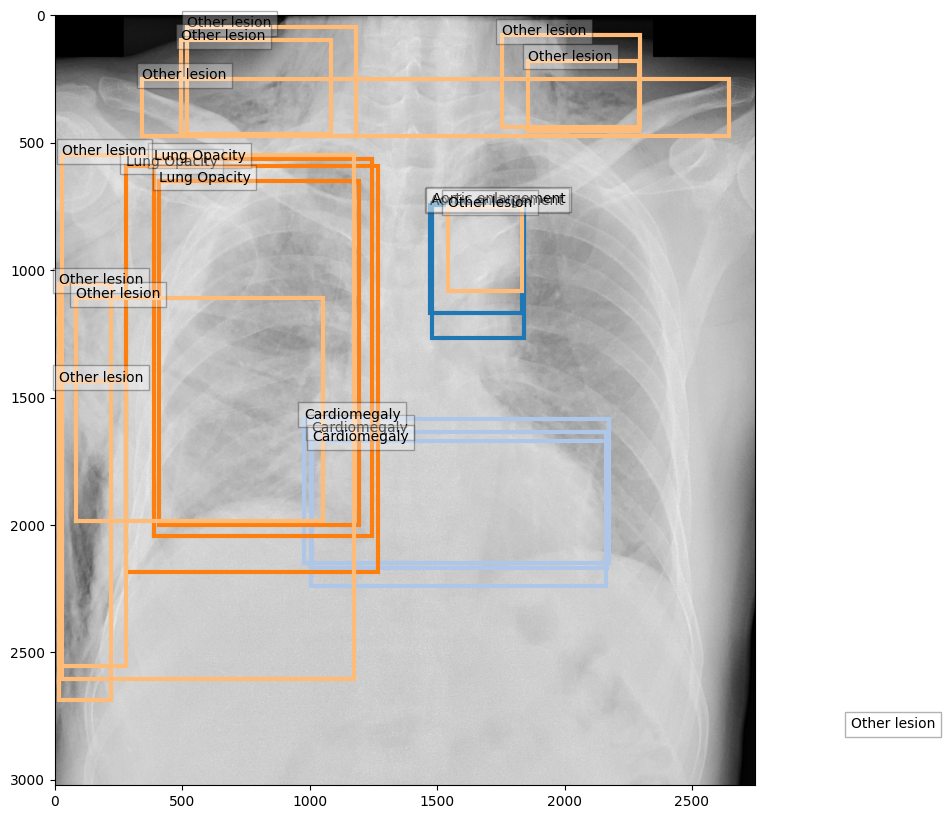

In [45]:
# key = train_image_ids[16]
key = 'cffa67149b86b1359623d25f061a2063'
print_labels(image_id_2_labels[key])
print(key)
visualize_image_with_bounding_boxes(key, train_image_id_2_bboxes[key], verbose=True)

In [36]:
test_image_id_2_bboxes = load_test_image_id_2_bboxes()

Anomalous bboxes found: 0 of 2697


In [41]:
len(test_image_id_2_bboxes)

949

In [38]:
test_image_ids = list(test_image_id_2_bboxes.keys())

0: Aortic enlargement (1)
17: Pleural thickening (1)
26: Other disease (1)
4f737958fc5a7d9805f4a94f70cfc5a2
image_path: /mnt/workspace/vinbig-cxr/dataset-jpg/images/4f737958fc5a7d9805f4a94f70cfc5a2.jpg
0: Aortic enlargement
[[717.6734784200398, 833.8739055372698, 1209.1647877936346, 1201.5248849899588]]
1: Pleural thickening
[[264.93712907932763, 1328.9161908138483, 428.85457392248907, 1632.163463773697]]


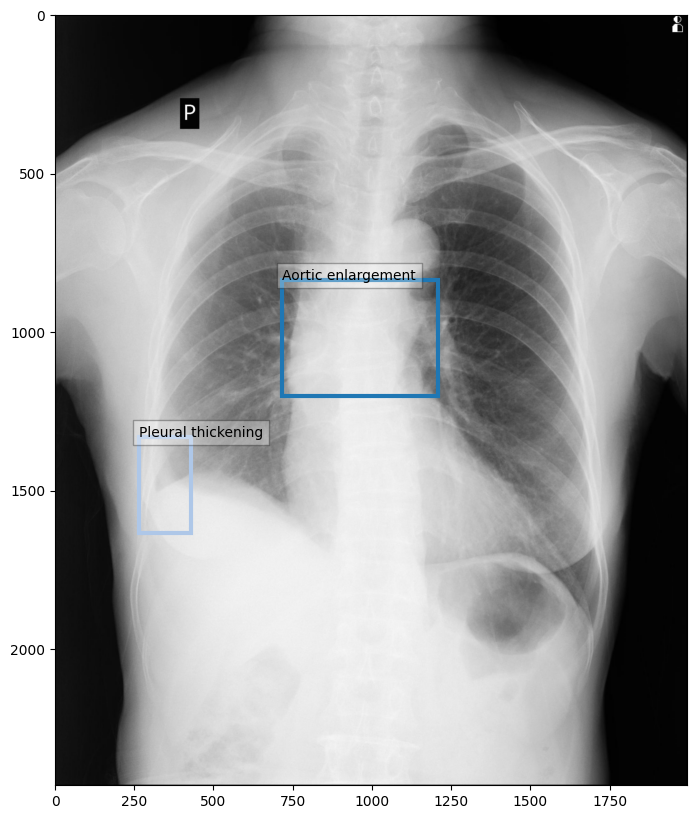

In [44]:
key = test_image_ids[-1]
print_labels(image_id_2_labels[key])
print(key)
visualize_image_with_bounding_boxes(key, test_image_id_2_bboxes[key], verbose=True)

10: Infiltration (1)
17: Pleural thickening (1)
19: Pulmonary fibrosis (1)
25: Tuberculosis (1)
9c91dd728f43b2c18c80674c11321fb4
image_path: /mnt/workspace/vinbig-cxr/dataset-jpg/images/9c91dd728f43b2c18c80674c11321fb4.jpg
0: Infiltration
[[342.13899613899594, 730.6530604417719, 762.1389961389959, 1294.653060441772]]
1: Pleural thickening
[[1150.138996138996, 470.6530604417719, 1626.138996138996, 710.6530604417719], [426.138996138996, 458.6530604417719, 822.1389961389959, 534.6530604417719], [1226.138996138996, 1854.653060441772, 1386.138996138996, 2022.653060441772]]
2: Pulmonary fibrosis
[[466.138996138996, 550.6530604417719, 838.1389961389959, 878.6530604417719], [1134.138996138996, 630.6530604417719, 1582.138996138996, 1134.653060441772]]


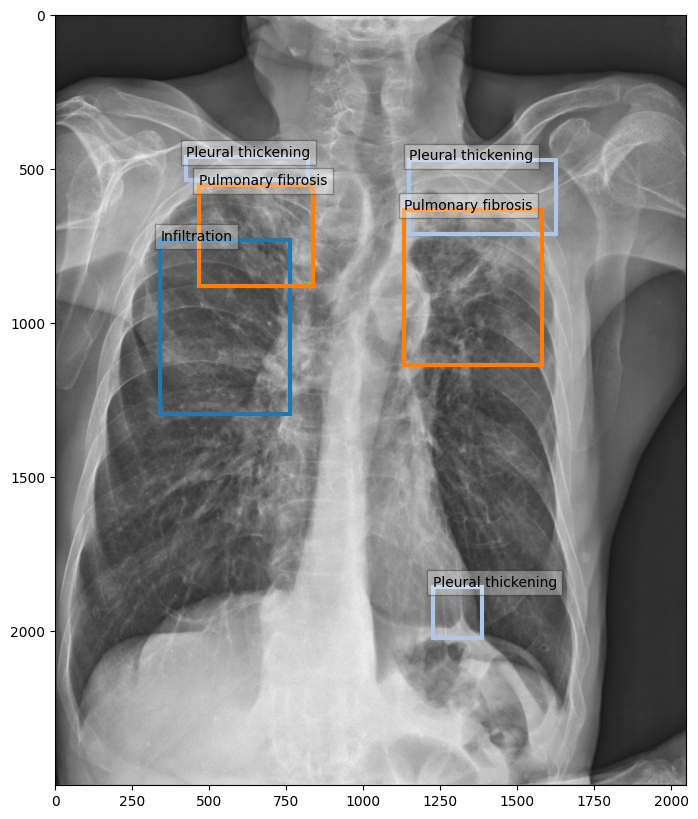

In [49]:
key = test_image_ids[-5]
print_labels(image_id_2_labels[key])
print(key)
visualize_image_with_bounding_boxes(key, test_image_id_2_bboxes[key], verbose=True)

In [128]:
!pip install pydicom

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 63.3 MB/s eta 0:00:00


In [1]:
import pydicom
import matplotlib.pyplot as plt

def display_dicom_image(dicom_file):
    # Read the DICOM file
    ds = pydicom.dcmread(dicom_file)

    # Extract pixel data
    pixel_array = ds.pixel_array
    print(pixel_array.shape)

    # Display the image using matplotlib
    plt.imshow(pixel_array, cmap=plt.cm.gray)
    plt.axis('off')
    plt.show()

(2836, 2336)


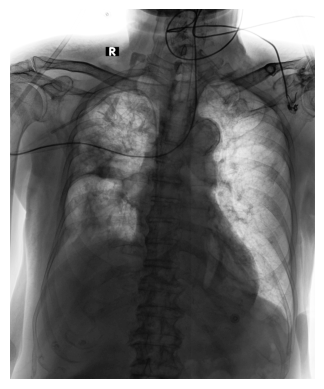

In [132]:
display_dicom_image('/mnt/workspace/vinbig-cxr/test/19e0d6ab0dc61189088d0e149c5871ac.dicom')

In [135]:
def dicom_to_jpeg(dicom_file, output_path):
    from PIL import Image
    # Read the DICOM file
    ds = pydicom.dcmread(dicom_file)

    # Extract pixel data
    pixel_array = ds.pixel_array

    # Normalize the pixel data
    image = (pixel_array / pixel_array.max()) * 255.0
    image = image.astype('uint8')

    # Create PIL Image object from pixel array
    img = Image.fromarray(image)

    # Save the image as JPEG
    img.save(output_path)

In [136]:
dicom_to_jpeg('/mnt/workspace/vinbig-cxr/test/19e0d6ab0dc61189088d0e149c5871ac.dicom', '/home/pamessina/tmp.jpg')

In [137]:
from IPython.display import Image

In [140]:
ls -lh '/mnt/workspace/vinbig-cxr/test/19e0d6ab0dc61189088d0e149c5871ac.dicom'

-rw-rw-r-- 1 pamessina socvis 13M Dec 29  2020 /mnt/workspace/vinbig-cxr/test/19e0d6ab0dc61189088d0e149c5871ac.dicom


In [34]:
from medvqa.datasets.vinbig import (
    load_labels,
    load_test_image_id_2_bboxes,
    load_train_image_id_2_bboxes,
    VINBIG_LABELS,
    visualize_image_with_bounding_boxes,
)

In [12]:
train_image_id_2_labels, test_image_id_2_labels = load_labels()

In [14]:
len(train_image_id_2_labels), len(test_image_id_2_labels)

(15000, 3000)

In [15]:
train_image_id_2_bboxes = load_train_image_id_2_bboxes()
test_image_id_2_bboxes = load_test_image_id_2_bboxes()
len(train_image_id_2_bboxes), len(test_image_id_2_bboxes)

Anomalous bboxes found: 0 of 37367
Anomalous bboxes found: 0 of 2697


(4522, 949)

In [22]:
train_conflict_ids = []
for image_id, labels in train_image_id_2_labels.items():
    try:
        bboxes = train_image_id_2_bboxes[image_id]
    except KeyError:
        bboxes = {}
    try:
        for class_name, boxes in bboxes.items():
            class_idx = VINBIG_LABELS.index(class_name)
            assert labels[class_idx] == 1
        for class_name in VINBIG_BBOX_NAMES:
            if class_name not in bboxes:
                class_idx = VINBIG_LABELS.index(class_name)
                assert labels[class_idx] == 0
    except AssertionError:
        train_conflict_ids.append(image_id)
print(len(train_conflict_ids))

123


In [23]:
test_conflict_ids = []
for image_id, labels in test_image_id_2_labels.items():
    try:
        bboxes = test_image_id_2_bboxes[image_id]
    except KeyError:
        bboxes = {}
    try:
        for class_name, boxes in bboxes.items():
            class_idx = VINBIG_LABELS.index(class_name)
            assert labels[class_idx] == 1
        for class_name in VINBIG_BBOX_NAMES:
            if class_name not in bboxes:
                class_idx = VINBIG_LABELS.index(class_name)
                assert labels[class_idx] == 0
    except AssertionError:
        test_conflict_ids.append(image_id)
print(len(test_conflict_ids))

0


e9b5834cbf08d0e6df1ac3c6f3ddc6b9
['No finding']
{'Aortic enlargement': [[1078.3399658203, 784.22198486328, 1310.5200195312, 1011.6799926758]]}
image_path: /mnt/workspace/vinbig-cxr/dataset-jpg/images/e9b5834cbf08d0e6df1ac3c6f3ddc6b9.jpg


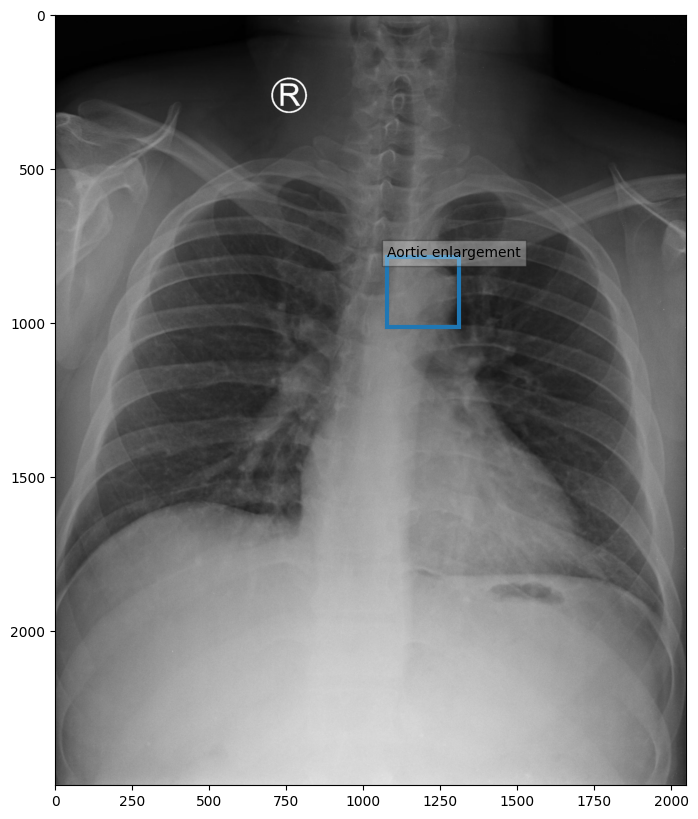

In [54]:
i = -10
image_id = train_conflict_ids[i]
print(image_id)
print([VINBIG_LABELS[i] for i,x in enumerate(train_image_id_2_labels[image_id]) if x])
print(train_image_id_2_bboxes[image_id])
visualize_image_with_bounding_boxes(image_id, train_image_id_2_bboxes[image_id])